In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.preprocessing import MinMaxScaler
import os
import random

In [2]:
def set_seed(seed: int):
    random.seed(seed) # Python
    np.random.seed(seed)  # Numpy, é o gerador utilizado pelo sklearn
    os.environ["PYTHONHASHSEED"] = str(seed)  # sistema operativo

set_seed(25)

In [3]:
# Load dataset
radi = pd.read_csv("../prep6/train_full_prep6.csv")

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

# Estado vai ser comum para todos os modelos, 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=25)


## Bagging

In [5]:
# Split data into features and target
df = radi.copy()
X = df.drop(columns=["Transition"])
y = df["Transition"]

bagging_params = {"n_estimators": [50,100,300]}
bagging_model = BaggingClassifier(random_state=2025)
bagging_grid = GridSearchCV(bagging_model, bagging_params, scoring='f1_macro', cv=skf, n_jobs=-1)
bagging_grid.fit(X, y)
print(f"Best RandomForest Model Parameters: {bagging_grid.best_params_}")
f1_scores = cross_val_score(bagging_grid.best_estimator_,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())

Best RandomForest Model Parameters: {'n_estimators': 300}
0.7082764110422198


## Random Forest

Best RandomForest Model Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}
0.7262766218177363


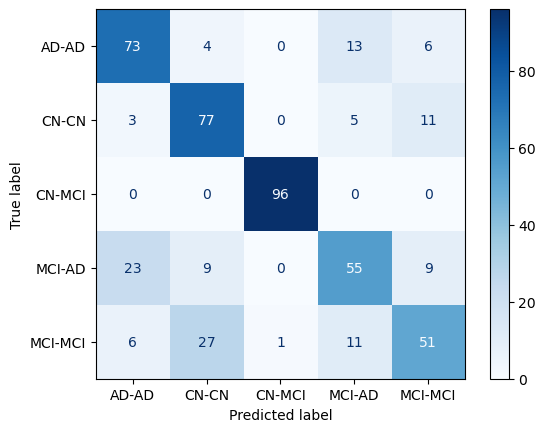

In [26]:
# Split data into features and target
df = radi.copy()
X = df.drop(columns=["Transition"])
y = df["Transition"]

# Params Definition
"""
rf_params = {"n_estimators": [100,300,500],
             "max_depth": [5, 10, 20, None],
             "criterion" :["gini","entropy"],
             "max_features":["sqrt","log2", None]     
             }
             "500"
             "20"
             "entropy"
             "sqrt"
             0.7262766218177363
"""

rf_params = {"n_estimators": [500],
             "max_depth": [20],
             "criterion" :["entropy"],
             "max_features":["sqrt"]    
             }

            
rf_model = RandomForestClassifier(random_state=2025)

# model, params, scoring using f1, 5 folds, full processor
rf_grid = GridSearchCV(rf_model, rf_params, scoring='f1_macro', cv=skf, n_jobs=-1)
rf_grid.fit(X,y)
print(f"Best RandomForest Model Parameters: {rf_grid.best_params_}")
f1_scores = cross_val_score(rf_grid.best_estimator_,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())

y_pred = cross_val_predict(rf_grid.best_estimator_, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_grid.best_estimator_.classes_)
disp.plot(cmap="Blues")

## Gradient Boosting

Best Gradient Boost Model Parameters: {'learning_rate': 0.3, 'loss': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
0.7353970650635426


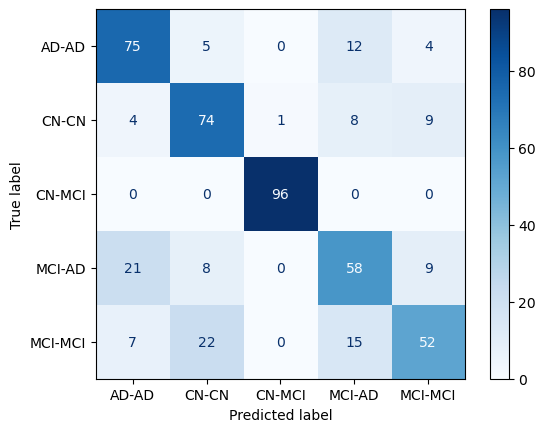

In [15]:
# Split data into features and target
df = radi.copy()
X = df.drop(columns=["Transition"])
y = df["Transition"]

# Params Definition
"""
gb_params = {"n_estimators": [100,50,300],
             "max_depth": [5, 10, 20, None],
             "learning_rate": [0.1, 0.3,0.01],
             "max_features":["sqrt","log2", None],
             "loss": ["log_loss", "exponential"]
             }
             
             "100"
             "10"
             "0.3"
             "None"
             "log_loss"
             0.7353970650635426
"""

gb_params = {"n_estimators": [100],
             "max_depth": [10],
             "learning_rate": [0.3],
             "max_features":["sqrt"],
             "loss": ["log_loss"]
             }
gb_model = GradientBoostingClassifier(random_state=2025)

# model, params, scoring using f1, 5 folds, full processor
gb_grid = GridSearchCV(gb_model, gb_params, scoring='f1_macro', cv=skf, n_jobs=-1)
gb_grid.fit(X,y)
print(f"Best Gradient Boost Model Parameters: {gb_grid.best_params_}")
f1_scores = cross_val_score(gb_grid.best_estimator_,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(gb_grid.best_estimator_, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_grid.best_estimator_.classes_)
disp.plot(cmap="Blues")

## XGBoosting

Best XGB Model Parameters: {'eval_metric': 'mlogloss', 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300}
0.7081589486246873


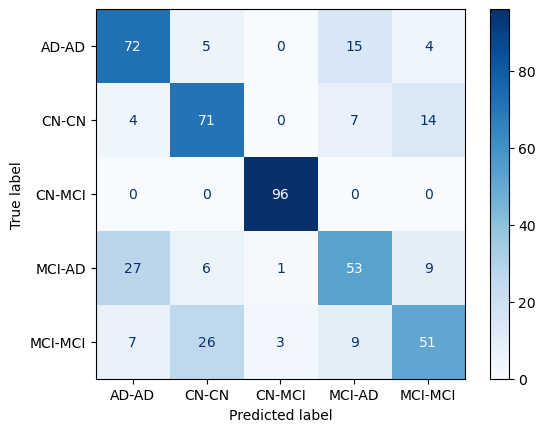

In [20]:
# Split data into features and target
df = radi.copy()
X = df.drop(columns=["Transition"])
y = df["Transition"]

"""

xgb_params = {
    "n_estimators": [50,100,200,300],
    "learning_rate": [0.1,0.01,0.3],
    "max_depth": [5,6,8,0],
    "eval_metric":["mlogloss","merror","auc"]

}
    "300"
    "0.3"
    "5"
    "mlogloss"
    0.7081589486246873
"""

xgb_params = {
    "n_estimators": [300],
    "learning_rate": [0.3],
    "max_depth": [5],
    "eval_metric":["mlogloss"]
    
}

xgb_model = XGBClassifier(random_state=2025)

# Initialize and fit LabelEncoder on `y` to transform labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# model, params, scoring using f1, 5 folds, full processor
xgb_grid = GridSearchCV(xgb_model, xgb_params, scoring='f1_macro', cv=skf, n_jobs=-1)
xgb_grid.fit(X,y_encoded)
print(f"Best XGB Model Parameters: {xgb_grid.best_params_}")
f1_scores = cross_val_score(xgb_grid.best_estimator_,X,y_encoded,cv=skf,scoring="f1_macro")
print(f1_scores.mean())

# Generate predictions using cross-validation
y_pred = cross_val_predict(xgb_grid.best_estimator_, X, y_encoded, cv=skf)

# Decode y_encoded and y_pred back to original labels
y_decoded = label_encoder.inverse_transform(y_encoded)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Generate the confusion matrix
cm = confusion_matrix(y_decoded, y_pred_decoded)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")

## SVM

Best SVM Model Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.744010657763584


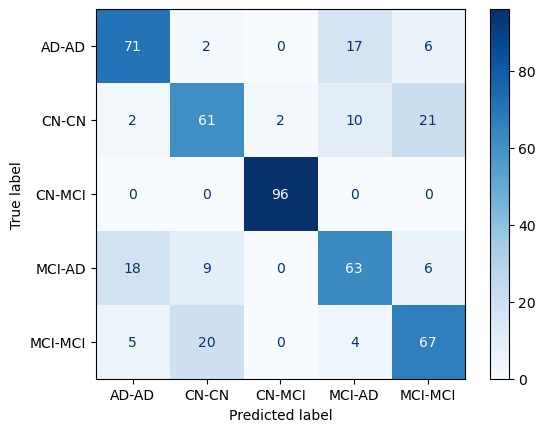

In [21]:
from sklearn.svm import SVC

df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]

"""
# Define the parameter grid for SVC
param_grid = {
    'C': [1, 10, 100,1000],              # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly','sigmoid','precomputed'],  # Kernel types ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
    'gamma': ['scale', 'auto'],           # Kernel coefficient for 'rbf' and 'poly' kernels
}
    "100"
    "rbf"
    "scale"
    0.744010657763584
"""

param_grid = {
    'C': [1, 10, 100,1000],             
    'kernel': ['linear', 'rbf', 'poly','sigmoid'], 
    'gamma': ['scale', 'auto'],      
} 

# Initialize the SVC model
svm_model = SVC(random_state=2025)

svm_grid = GridSearchCV(svm_model,param_grid, 
                           cv=skf, scoring='f1_macro', n_jobs=-1)

svm_grid.fit(X, y)
print(f"Best SVM Model Parameters: {svm_grid.best_params_}")
f1_scores = cross_val_score(svm_grid.best_estimator_,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(svm_grid.best_estimator_, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_grid.best_estimator_.classes_)
disp.plot(cmap="Blues")

## Stacking

0.7564875159987209


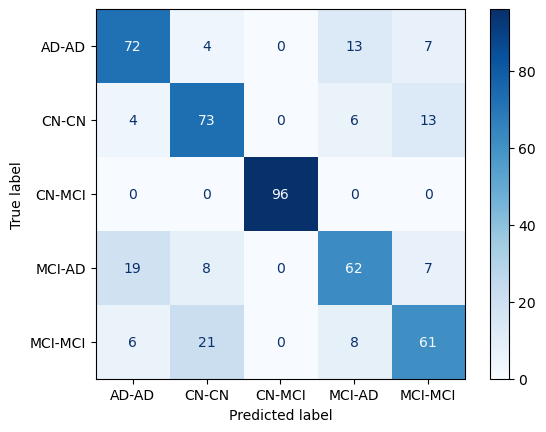

In [22]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]

meta_model = RandomForestClassifier(random_state=25)

#svm_grid.fit(X,y)
#gb_grid.fit(X,y)
#rf_grid.fit(X,y)

estimators = [("gb", gb_grid.best_estimator_), ("svm", svm_grid.best_estimator_), ("rf", rf_grid.best_estimator_)]
st_model = StackingClassifier(estimators=estimators, final_estimator = meta_model,n_jobs=-1) 
st_model.fit(X,y)
f1_scores = cross_val_score(st_model,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(st_model, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=st_model.classes_)
disp.plot(cmap="Blues")

## Max Voting

0.7490927004773723


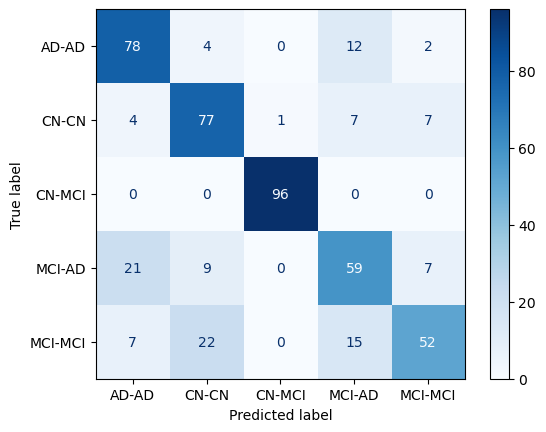

In [23]:
from sklearn.ensemble import VotingClassifier

df = radi.copy()
X = df.drop(columns=["Transition"]) 
y = df["Transition"]

estimators = [("gb", gb_grid.best_estimator_), ("svm", svm_grid.best_estimator_), ("rf", rf_grid.best_estimator_)]
vt_model = VotingClassifier(estimators=estimators, voting = 'hard', weights = [3,1,2],n_jobs=-1) 
vt_model.fit(X,y)
f1_scores = cross_val_score(vt_model,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())
y_pred = cross_val_predict(vt_model, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vt_model.classes_)
disp.plot(cmap="Blues")

## Generating csv

In [30]:
radi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Columns: 842 entries, Age to Transition
dtypes: float64(841), object(1)
memory usage: 3.1+ MB


In [31]:
test_data = pd.read_csv("../prep6/test_processed_prep6.csv")

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 841 entries, Age to lbp-3D-m2_glrlm_LongRunLowGrayLevelEmphasis
dtypes: float64(841)
memory usage: 657.2 KB


In [32]:
# Load the test dataset
test_data = pd.read_csv("../prep6/test_processed_prep6.csv")


# Generate predictions using the RandomForest model
rf_predictions_test = rf_grid.best_estimator_.predict(test_data)

# Generate predictions using the GB model
gb_predictions_test = gb_grid.best_estimator_.predict(test_data)

xgb_predictions_test = xgb_grid.best_estimator_.predict(test_data)

# Generate predictions using the Voting model
st_predictions_test = st_model.predict(test_data)

# Generate predictions using the Voting model
vb_predictions_test = vt_model.predict(test_data)

xgb_predictions_test_decoded = label_encoder.inverse_transform(xgb_predictions_test)

res0 = pd.DataFrame({
    'RowId': range(1, len(xgb_predictions_test_decoded ) + 1),
    'Result': xgb_predictions_test_decoded 
})


# Store the results in a DataFrame and save to CSV
res1 = pd.DataFrame({
    'RowId': range(1, len(rf_predictions_test) + 1),
    'Result': rf_predictions_test
})

# Store the results in a DataFrame and save to CSV
res2 = pd.DataFrame({
    'RowId': range(1, len(gb_predictions_test) + 1),
    'Result': gb_predictions_test
})

res3 = pd.DataFrame({
    'RowId': range(1, len(vb_predictions_test) + 1),
    'Result': vb_predictions_test
})

res4 = pd.DataFrame({
    'RowId': range(1, len(st_predictions_test) + 1),
    'Result': st_predictions_test
})



# Save predictions to a CSV file
res0.to_csv('NXGBGrid6.0.csv', index=False)
res1.to_csv('NRandomForestGrid6.0.csv', index=False)
res2.to_csv('NGradientBoostingGrid6.0.csv', index=False)
res3.to_csv('NVoting6.0.csv', index=False)
res4.to_csv('NStacking6.0.csv', index=False)

Best RandomForest Model Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 25}
0.7225843129413901


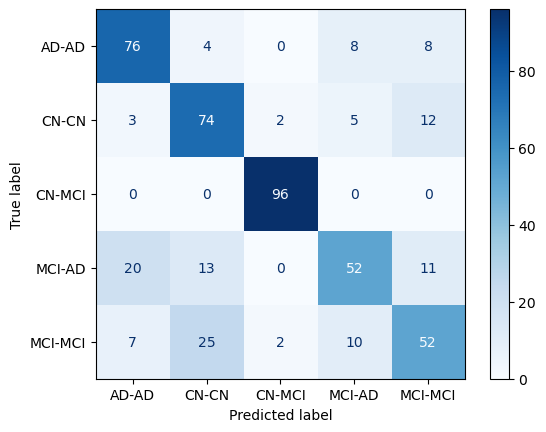

In [25]:
# Split data into features and target
df = radi.copy()
X = df.drop(columns=["Transition"])
y = df["Transition"]

# Params Definition
"""
rf_params = {"n_estimators": [100,300,500],
             "max_depth": [5, 10, 20, None],
             "criterion" :["gini","entropy"],
             "max_features":["sqrt","log2", None]     
             }
             "500"
             "20"
             "entropy"
             "sqrt"
             0.7262766218177363
"""

rf_params2 = {"n_estimators": [25],
             "max_depth": [10],
             "criterion" :["entropy"],
             "max_features":["sqrt"]  
             }

            
rf_model2 = RandomForestClassifier(random_state=2025)

# model, params, scoring using f1, 5 folds, full processor
rf_grid2 = GridSearchCV(rf_model2, rf_params2, scoring='f1_macro', cv=skf, n_jobs=-1)
rf_grid2.fit(X,y)
print(f"Best RandomForest Model Parameters: {rf_grid2.best_params_}")
f1_scores = cross_val_score(rf_grid2.best_estimator_,X,y,cv=skf,scoring="f1_macro")
print(f1_scores.mean())

y_pred = cross_val_predict(rf_grid2.best_estimator_, X, y, cv=skf)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_grid2.best_estimator_.classes_)
disp.plot(cmap="Blues")

# Load the test dataset
# test_data = pd.read_csv("../prep6/test_processed_prep6.csv")
# rf_predictions_test2 = rf_grid2.best_estimator_.predict(test_data)

# Tentar arranjar o melhor modelo!